# 파이썬을 활용한 머신러닝
## 스피어 피싱 모의훈련 서비스 제작

<strong>idea : </strong>
1. 이 프로젝트의 주제는 개인에 대한 스피어피싱 문구 제작이다.
2. 현재는 키워드를 입력하면 그에 맞게 데이터를 수집해 데이터프레임을 생성하고 현재 엑셀파일로 변환까지 한다.
3. 2번대로만 코드가 수행된다면 1번의 내용을 이행하지 못한다.
4. 3번대로 1번의 내용을 수행하기 위해서는 엑셀 파일에 여러 데이터 시트가 있는 점을 활용해 공격하고자 하는 유사한 키워드를 모아서 수집한걸 데이터프레임에 각 저장 후 엑셀의 여러 시트에 기록한다. 
5. 이후 자연어 처리는 엑셀의 여러 시트를 참조하여 공격하고자 하는 대상의 아이디를 탐색해 여러 정보들을 머신러닝으로 파악하고자 한다.

<strong>자연어 처리 계획 : </strong>
1. 자연어 처리는 일단 여러 시트를 참조하기 위한 data_set 엑셀 파일과 공격하는 대상에 대한 정보가 저장되는 파일을 새로 만든다,
2. data_set 엑셀 파일에서 공격대상에 대한 여러 테이블 정의서에 예상한대로 여러 정보가 저장되는 새 엑셀 파일 기반 자연어 처리를 할 것이다. 자연어 처리에서는 다음의 정보들을 머신러닝으로 파악하고자 한다.

<strong>자연어 처리에서 파악하고자 하는 정보: </strong> nltk 
1. 많이 사용하는 단어, 어투
2. 특정 단어로 시작하는 그룹

<strong>결과물 : </strong>
1. 머신러닝을 돌려 사람의 성향을 파악했네? (tensorflow or sklearn)
2. 성향에 맞는 문구를 작성해 그 사람이 특정 링크 혹 파일을 누르도록 유도. (nltk)
3. 모의훈련이니 모의훈련에 맞는 모의훈련 결과 그래프 그리기(seaborn)

<strong>주의 : </strong>
+ ^^ 중요한건 기간이 짧다.
+ ??? : 일어나 코딩해야지 *^0^*.

### 모듈_호출

In [32]:
from bs4 import BeautifulSoup #웹 크롤링
from urllib.request import urlopen #url
from urllib import parse #url2
import tweepy #트위터
import numpy as np #기본
import pandas as pd #데이터프레임
import matplotlib.pyplot as plt #그래프
import nltk #자연어처리
import time

### 트위터 키

In [16]:
consumer_key = "oCfme0qMTyYybPUU0ABwKNHKg"
consumer_secret = "1VP4phAtG0Y1ILTe5RGL7XYGHkNrWEzzxv8fk0cWym1p9yfNIO"
access_token = "2910321932-RkciOAbw8WYB2nIISDrFSREfbDnxDIydAdX2mLB"
access_token_secret = "faRZmsdWYWQ8mLdYN40qmj7B5eA0Ifl9RglLohzi8fCqa"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth, wait_on_rate_limit=True)

### 키워드

In [25]:
keyword = ['아이돌','여자친구','방탄소년단','엑소','하스스톤','백현']
kesults = []
for x in range(len(keyword)):
    point = parse.quote(keyword[x])
    kesults.append("https://twitter.com/search?q="+point+"&src=typed_query&lang=ko")
    print(kesults[x],end="\n")

print("\n")
urlp = kesults[1]
print(urlp)

https://twitter.com/search?q=%EC%95%84%EC%9D%B4%EB%8F%8C&src=typed_query&lang=ko
https://twitter.com/search?q=%EC%97%AC%EC%9E%90%EC%B9%9C%EA%B5%AC&src=typed_query&lang=ko
https://twitter.com/search?q=%EB%B0%A9%ED%83%84%EC%86%8C%EB%85%84%EB%8B%A8&src=typed_query&lang=ko
https://twitter.com/search?q=%EC%97%91%EC%86%8C&src=typed_query&lang=ko
https://twitter.com/search?q=%ED%95%98%EC%8A%A4%EC%8A%A4%ED%86%A4&src=typed_query&lang=ko
https://twitter.com/search?q=%EB%B0%B1%ED%98%84&src=typed_query&lang=ko


https://twitter.com/search?q=%EC%97%AC%EC%9E%90%EC%B9%9C%EA%B5%AC&src=typed_query&lang=ko


### 수집

In [ ]:
results = []

for tweet in tweepy.Cursor(api.search, q=keyword[5], count=10).items():
    results.append(tweet)
    
print(len(results))

### 데이터프레임

In [ ]:
def process_results(results):
    id_list = [tweet.id for tweet in results]
    data_set = pd.DataFrame(id_list, columns=["id"])

    # Processing Tweet Data
    data_set["text"] = [tweet.text for tweet in results]
    data_set["created_at"] = [tweet.created_at for tweet in results]
    data_set["retweet_count"] = [tweet.retweet_count for tweet in results]
    data_set["favorite_count"] = [tweet.favorite_count for tweet in results]
    data_set["source"] = [tweet.source for tweet in results]

    # Processing User Data
    data_set["user_id"] = [tweet.author.id for tweet in results]
    data_set["user_screen_name"] = [tweet.author.screen_name for tweet in results]
    data_set["user_name"] = [tweet.author.name for tweet in results]
    data_set["user_created_at"] = [tweet.author.created_at for tweet in results]
    data_set["user_description"] = [tweet.author.description for tweet in results]
    data_set["user_followers_count"] = [tweet.author.followers_count for tweet in results]
    data_set["user_friends_count"] = [tweet.author.friends_count for tweet in results]
    data_set["user_location"] = [tweet.author.location for tweet in results]

    return data_set

data_set = process_results(results)
data_set

### 입출력

In [ ]:
#index = str(1)
#hello = 'Sheet' + index
data_set.to_excel('data_set.xlsx',sheet_name='Sheet1')
data_set = pd.read_excel('data_set.xlsx', sheetname='Sheet1')
data_set

###  통합
<strong>수정된 통합 코드 : </strong>
1. 키워드를 리스트에서 인덱싱하는 형식이 아니라 문자열에 연산자를 추가했음.
2. 이에 따라 반복문을 통해 시트를 추가하는 형식이 아닌 한 시트에 지정된 키워드에 대한 데이터프레임을 담기로 함.
3. 이때 길이가 겁나 많아서(9400 이상) 일단은 길이제한을 두기로 함.

<strong>에휴 : </strong>
+ ^^ 중요한건 기간이 짧다.
+ ??? : 일어나 코딩해야지 *^0^*.

### 수정된 통합 코드, 데이터셋 생성

In [3]:
import tweepy
import pandas as pd
import time

consumer_key = "oCfme0qMTyYybPUU0ABwKNHKg"
consumer_secret = "1VP4phAtG0Y1ILTe5RGL7XYGHkNrWEzzxv8fk0cWym1p9yfNIO"
access_token = "2910321932-RkciOAbw8WYB2nIISDrFSREfbDnxDIydAdX2mLB"
access_token_secret = "faRZmsdWYWQ8mLdYN40qmj7B5eA0Ifl9RglLohzi8fCqa"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth, wait_on_rate_limit=True)

keyword = '여자친구 OR 방탄소년단 OR 엑소'

results = []
ap = results.append

for tweet in tweepy.Cursor(api.search, q=keyword, count=100).items():
    if(len(results)<=700):
        ap(tweet)
        print(len(results))
    else:
        break

def process_results(results):
    id_list = [tweet.id for tweet in results]
    data_set = pd.DataFrame(id_list, columns=["id"])

    # Processing Tweet Data
    data_set["text"] = [tweet.text for tweet in results]
    data_set["created_at"] = [tweet.created_at for tweet in results]
    data_set["retweet_count"] = [tweet.retweet_count for tweet in results]
    data_set["favorite_count"] = [tweet.favorite_count for tweet in results]
    data_set["source"] = [tweet.source for tweet in results]

    # Processing User Data
    data_set["user_id"] = [tweet.author.id for tweet in results]
    data_set["user_screen_name"] = [tweet.author.screen_name for tweet in results]
    data_set["user_name"] = [tweet.author.name for tweet in results]
    data_set["user_created_at"] = [tweet.author.created_at for tweet in results]
    data_set["user_description"] = [tweet.author.description for tweet in results]
    data_set["user_followers_count"] = [tweet.author.followers_count for tweet in results]
    data_set["user_friends_count"] = [tweet.author.friends_count for tweet in results]
    data_set["user_location"] = [tweet.author.location for tweet in results]

    return data_set

data_set = process_results(results)
writer = pd.ExcelWriter('multi_df_to_excel.xlsx')
data_set.to_excel(writer,sheet_name='x')
writer.save()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


### 파일 호출

In [4]:
data_set = pd.read_excel('multi_df_to_excel.xlsx', sheetname='x')
data_set

C:\Users\dsz08\Anaconda3\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


,Unnamed: 0,id,text,created_at,retweet_count,favorite_count,source,user_id,user_screen_name,user_name,user_created_at,user_description,user_followers_count,user_friends_count,user_location
0,0,1127205151884754944,RT @bts_bighit: [#방탄밤][#방밤캠] #방탄소년단 2019 BBMAs...,2019-05-11 13:33:45,61451,0,Twitter for iPhone,1125437364023614976,JxjOSooYhealTLs,써연,2019-05-06 16:29:11,NaN,0,22,NaN
1,1,1127205149599052032,RT @hope_crescent: 20190505 SYS IN LA\n\n🌟 \n\...,2019-05-11 13:33:44,3988,0,Twitter for Android,1109496407747105024,Hoseok2305,Vale 🦕,2019-03-23 16:45:31,"Monbebe, Army, Atiny 🙋🏽‍♀️💕 //\nPaso más tiemp...",24,139,NaN
2,2,1127205148449751040,RT @bts_bighit: [#방탄밤][#방밤캠] #방탄소년단 2019 BBMAs...,2019-05-11 13:33:44,61451,0,Twitter for iPhone,2600567580,JahidiryMichel,Jahidiry Michel •,2014-07-02 22:48:23,18🤟🏼// Hey! I’m Boricua🇵🇷 a Limelight🇺🇸 and Ar...,1044,1879,"San Juan,Puerto Rico🇵🇷"
3,3,1127205148340526976,RT @bts_bighit: [#오늘의방탄] 우린 앞으로 계속 같은 생각으로 같은 ...,2019-05-11 13:33:44,278711,0,Twitter for Android,956672479220543488,FeVHope,NO ONE,2018-01-25 23:37:47,🇵🇭🇰🇷\nA little bit crazy town girl 😄\nARMY💣VHo...,1119,1328,ENG | KR
4,4,1127205147673649024,RT @NYPD19Pct: 우리는 방탄소년단 #BTS 팬들이 다음 주 수요일 섬머스...,2019-05-11 13:33:44,3731,0,Twitter for iPhone,983739996468215808,selvieRumerung,vie,2018-04-10 16:14:26,NaN,14,68,"Osaka-fu, Japan"
5,5,1127205145853480960,RT @bts_bighit: [#방탄밤][#방밤캠] #방탄소년단 2019 BBMAs...,2019-05-11 13:33:43,61451,0,Twitter for Android,731218271085678592,gabyangarita14,Gabriela Angarita,2016-05-13 20:23:16,me gusta bailar!\nescuchar musica!\n°you make ...,18,57,"Bogotá, D.C., Colombia"
6,6,1127205144788029056,RT @jiminiful: 190505 #JIMIN\n🤪🥵🎢\n\n#지민 #방탄소년...,2019-05-11 13:33:43,20802,0,Twitter for Android,927519897969496064,ally281017,북극곰,2017-11-06 12:55:50,NaN,1,28,NaN
7,7,1127205144326754048,RT @bts_bighit: [#방탄밤][#방밤캠] #방탄소년단 2019 BBMAs...,2019-05-11 13:33:43,61451,0,Twitter for Android,1047255012341108992,Kookiebotty,Botty 🤟🏻💜,2018-10-02 22:40:26,🌟KIM NAMJOON🌟KIM SEOKJIN\n🌟MIN YOONGI🌟JUNG HOS...,1461,312,NaN
8,8,1127205141105405952,RT @Ryo71603Ryo: ジミンぺんの方は騙されたと思って\n1回聴いてみて下さい\...,2019-05-11 13:33:42,46,0,Twitter for iPhone,813030391606980608,ttxxyng22,ㅇㄱㄹ🦍てぎおばさん,2016-12-25 14:35:25,20⇧ BTS TXT Highlight / 93line,19,79,NaN
9,9,1127205140115508992,RT @VMIC1230: 190407 LYS in BKK\n\n#V #김태형 #태형...,2019-05-11 13:33:42,881,0,Twitter for Android,987002400354451456,ymismyheart,꾸꾸X찜찜❤,2018-04-19 16:18:04,Jimin is my angel x Jungkook is my heart♥ BTSx...,83,270,지민의 마음


### 색인

In [5]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 15 columns):
Unnamed: 0              701 non-null int64
id                      701 non-null int64
text                    701 non-null object
created_at              701 non-null datetime64[ns]
retweet_count           701 non-null int64
favorite_count          701 non-null int64
source                  701 non-null object
user_id                 701 non-null int64
user_screen_name        701 non-null object
user_name               701 non-null object
user_created_at         701 non-null datetime64[ns]
user_description        578 non-null object
user_followers_count    701 non-null int64
user_friends_count      701 non-null int64
user_location           378 non-null object
dtypes: datetime64[ns](2), int64(7), object(6)
memory usage: 82.2+ KB


In [6]:
data_set['id']

0      1127205151884754944
1      1127205149599052032
2      1127205148449751040
3      1127205148340526976
4      1127205147673649024
5      1127205145853480960
6      1127205144788029056
7      1127205144326754048
8      1127205141105405952
9      1127205140115508992
10     1127205139054416000
11     1127205138290994944
12     1127205133681614976
13     1127205133509479936
14     1127205133488726016
15     1127205132964262016
16     1127205131764679040
17     1127205131739704960
18     1127205131521379968
19     1127205131450077056
20     1127205131269955968
21     1127205128593763968
22     1127205128056872960
23     1127205126068888064
24     1127205126056185984
25     1127205125913600000
26     1127205125771144960
27     1127205125632585984
28     1127205124647149952
29     1127205122654781056
              ...         
671    1127204292266343936
672    1127204291784135040
673    1127204289661719040
674    1127204286650142976
675    1127204286243512064
676    1127204283659768064
6

### 리트윗된 아이디 컬럼 추가

In [26]:
ke = data_set['text']
ke = list(ke)
rtwi = [] #rtwl = retweet id
ap = rtwi.append
for x in range(len(ke)):
    kel = ke[x]
    kel = kel.split()
    kel = kel[1].split(':')
    kel = kel[0]
    if(list(kel)[0]=='@'):
        ap("https://twitter.com/"+kel)
    else:
        ap(0)
    print(rtwi[x],x)

https://twitter.com/@bts_bighit 0
https://twitter.com/@hope_crescent 1
https://twitter.com/@bts_bighit 2
https://twitter.com/@bts_bighit 3
https://twitter.com/@NYPD19Pct 4
https://twitter.com/@bts_bighit 5
https://twitter.com/@jiminiful 6
https://twitter.com/@bts_bighit 7
https://twitter.com/@Ryo71603Ryo 8
https://twitter.com/@VMIC1230 9
https://twitter.com/@BTS_KR_ARMY 10
https://twitter.com/@OAOV_2188 11
https://twitter.com/@bts_bighit 12
0 13
https://twitter.com/@bts_bighit 14
https://twitter.com/@bts_bighit 15
https://twitter.com/@bts_bighit 16
https://twitter.com/@GenieJK_ 17
https://twitter.com/@OAOV_2188 18
0 19
https://twitter.com/@taevideos 20
https://twitter.com/@bts_bighit 21
https://twitter.com/@BigHitEnt 22
https://twitter.com/@MoNiJunNi 23
https://twitter.com/@ExoCharts9 24
https://twitter.com/@BigHitEnt 25
https://twitter.com/@WWEXOL 26
https://twitter.com/@WWEXOL 27
https://twitter.com/@bts_bighit 28
https://twitter.com/@WWEXOL 29
https://twitter.com/@taevideos 30
https

In [29]:
rtwi

['https://twitter.com/@bts_bighit',
 'https://twitter.com/@hope_crescent',
 'https://twitter.com/@bts_bighit',
 'https://twitter.com/@bts_bighit',
 'https://twitter.com/@NYPD19Pct',
 'https://twitter.com/@bts_bighit',
 'https://twitter.com/@jiminiful',
 'https://twitter.com/@bts_bighit',
 'https://twitter.com/@Ryo71603Ryo',
 'https://twitter.com/@VMIC1230',
 'https://twitter.com/@BTS_KR_ARMY',
 'https://twitter.com/@OAOV_2188',
 'https://twitter.com/@bts_bighit',
 0,
 'https://twitter.com/@bts_bighit',
 'https://twitter.com/@bts_bighit',
 'https://twitter.com/@bts_bighit',
 'https://twitter.com/@GenieJK_',
 'https://twitter.com/@OAOV_2188',
 0,
 'https://twitter.com/@taevideos',
 'https://twitter.com/@bts_bighit',
 'https://twitter.com/@BigHitEnt',
 'https://twitter.com/@MoNiJunNi',
 'https://twitter.com/@ExoCharts9',
 'https://twitter.com/@BigHitEnt',
 'https://twitter.com/@WWEXOL',
 'https://twitter.com/@WWEXOL',
 'https://twitter.com/@bts_bighit',
 'https://twitter.com/@WWEXOL',
 'h

In [30]:
data_set["rtwi"] = rtwi

In [37]:
del data_set["Unnamed: 0"]
data_set

,id,text,created_at,retweet_count,favorite_count,source,user_id,user_screen_name,user_name,user_created_at,user_description,user_followers_count,user_friends_count,user_location,rtwi
0,1127205151884754944,RT @bts_bighit: [#방탄밤][#방밤캠] #방탄소년단 2019 BBMAs...,2019-05-11 13:33:45,61451,0,Twitter for iPhone,1125437364023614976,JxjOSooYhealTLs,써연,2019-05-06 16:29:11,NaN,0,22,NaN,https://twitter.com/@bts_bighit
1,1127205149599052032,RT @hope_crescent: 20190505 SYS IN LA\n\n🌟 \n\...,2019-05-11 13:33:44,3988,0,Twitter for Android,1109496407747105024,Hoseok2305,Vale 🦕,2019-03-23 16:45:31,"Monbebe, Army, Atiny 🙋🏽‍♀️💕 //\nPaso más tiemp...",24,139,NaN,https://twitter.com/@hope_crescent
2,1127205148449751040,RT @bts_bighit: [#방탄밤][#방밤캠] #방탄소년단 2019 BBMAs...,2019-05-11 13:33:44,61451,0,Twitter for iPhone,2600567580,JahidiryMichel,Jahidiry Michel •,2014-07-02 22:48:23,18🤟🏼// Hey! I’m Boricua🇵🇷 a Limelight🇺🇸 and Ar...,1044,1879,"San Juan,Puerto Rico🇵🇷",https://twitter.com/@bts_bighit
3,1127205148340526976,RT @bts_bighit: [#오늘의방탄] 우린 앞으로 계속 같은 생각으로 같은 ...,2019-05-11 13:33:44,278711,0,Twitter for Android,956672479220543488,FeVHope,NO ONE,2018-01-25 23:37:47,🇵🇭🇰🇷\nA little bit crazy town girl 😄\nARMY💣VHo...,1119,1328,ENG | KR,https://twitter.com/@bts_bighit
4,1127205147673649024,RT @NYPD19Pct: 우리는 방탄소년단 #BTS 팬들이 다음 주 수요일 섬머스...,2019-05-11 13:33:44,3731,0,Twitter for iPhone,983739996468215808,selvieRumerung,vie,2018-04-10 16:14:26,NaN,14,68,"Osaka-fu, Japan",https://twitter.com/@NYPD19Pct
5,1127205145853480960,RT @bts_bighit: [#방탄밤][#방밤캠] #방탄소년단 2019 BBMAs...,2019-05-11 13:33:43,61451,0,Twitter for Android,731218271085678592,gabyangarita14,Gabriela Angarita,2016-05-13 20:23:16,me gusta bailar!\nescuchar musica!\n°you make ...,18,57,"Bogotá, D.C., Colombia",https://twitter.com/@bts_bighit
6,1127205144788029056,RT @jiminiful: 190505 #JIMIN\n🤪🥵🎢\n\n#지민 #방탄소년...,2019-05-11 13:33:43,20802,0,Twitter for Android,927519897969496064,ally281017,북극곰,2017-11-06 12:55:50,NaN,1,28,NaN,https://twitter.com/@jiminiful
7,1127205144326754048,RT @bts_bighit: [#방탄밤][#방밤캠] #방탄소년단 2019 BBMAs...,2019-05-11 13:33:43,61451,0,Twitter for Android,1047255012341108992,Kookiebotty,Botty 🤟🏻💜,2018-10-02 22:40:26,🌟KIM NAMJOON🌟KIM SEOKJIN\n🌟MIN YOONGI🌟JUNG HOS...,1461,312,NaN,https://twitter.com/@bts_bighit
8,1127205141105405952,RT @Ryo71603Ryo: ジミンぺんの方は騙されたと思って\n1回聴いてみて下さい\...,2019-05-11 13:33:42,46,0,Twitter for iPhone,813030391606980608,ttxxyng22,ㅇㄱㄹ🦍てぎおばさん,2016-12-25 14:35:25,20⇧ BTS TXT Highlight / 93line,19,79,NaN,https://twitter.com/@Ryo71603Ryo
9,1127205140115508992,RT @VMIC1230: 190407 LYS in BKK\n\n#V #김태형 #태형...,2019-05-11 13:33:42,881,0,Twitter for Android,987002400354451456,ymismyheart,꾸꾸X찜찜❤,2018-04-19 16:18:04,Jimin is my angel x Jungkook is my heart♥ BTSx...,83,270,지민의 마음,https://twitter.com/@VMIC1230


In [31]:
data_set

,Unnamed: 0,id,text,created_at,retweet_count,favorite_count,source,user_id,user_screen_name,user_name,user_created_at,user_description,user_followers_count,user_friends_count,user_location,rtwi
0,0,1127205151884754944,RT @bts_bighit: [#방탄밤][#방밤캠] #방탄소년단 2019 BBMAs...,2019-05-11 13:33:45,61451,0,Twitter for iPhone,1125437364023614976,JxjOSooYhealTLs,써연,2019-05-06 16:29:11,NaN,0,22,NaN,https://twitter.com/@bts_bighit
1,1,1127205149599052032,RT @hope_crescent: 20190505 SYS IN LA\n\n🌟 \n\...,2019-05-11 13:33:44,3988,0,Twitter for Android,1109496407747105024,Hoseok2305,Vale 🦕,2019-03-23 16:45:31,"Monbebe, Army, Atiny 🙋🏽‍♀️💕 //\nPaso más tiemp...",24,139,NaN,https://twitter.com/@hope_crescent
2,2,1127205148449751040,RT @bts_bighit: [#방탄밤][#방밤캠] #방탄소년단 2019 BBMAs...,2019-05-11 13:33:44,61451,0,Twitter for iPhone,2600567580,JahidiryMichel,Jahidiry Michel •,2014-07-02 22:48:23,18🤟🏼// Hey! I’m Boricua🇵🇷 a Limelight🇺🇸 and Ar...,1044,1879,"San Juan,Puerto Rico🇵🇷",https://twitter.com/@bts_bighit
3,3,1127205148340526976,RT @bts_bighit: [#오늘의방탄] 우린 앞으로 계속 같은 생각으로 같은 ...,2019-05-11 13:33:44,278711,0,Twitter for Android,956672479220543488,FeVHope,NO ONE,2018-01-25 23:37:47,🇵🇭🇰🇷\nA little bit crazy town girl 😄\nARMY💣VHo...,1119,1328,ENG | KR,https://twitter.com/@bts_bighit
4,4,1127205147673649024,RT @NYPD19Pct: 우리는 방탄소년단 #BTS 팬들이 다음 주 수요일 섬머스...,2019-05-11 13:33:44,3731,0,Twitter for iPhone,983739996468215808,selvieRumerung,vie,2018-04-10 16:14:26,NaN,14,68,"Osaka-fu, Japan",https://twitter.com/@NYPD19Pct
5,5,1127205145853480960,RT @bts_bighit: [#방탄밤][#방밤캠] #방탄소년단 2019 BBMAs...,2019-05-11 13:33:43,61451,0,Twitter for Android,731218271085678592,gabyangarita14,Gabriela Angarita,2016-05-13 20:23:16,me gusta bailar!\nescuchar musica!\n°you make ...,18,57,"Bogotá, D.C., Colombia",https://twitter.com/@bts_bighit
6,6,1127205144788029056,RT @jiminiful: 190505 #JIMIN\n🤪🥵🎢\n\n#지민 #방탄소년...,2019-05-11 13:33:43,20802,0,Twitter for Android,927519897969496064,ally281017,북극곰,2017-11-06 12:55:50,NaN,1,28,NaN,https://twitter.com/@jiminiful
7,7,1127205144326754048,RT @bts_bighit: [#방탄밤][#방밤캠] #방탄소년단 2019 BBMAs...,2019-05-11 13:33:43,61451,0,Twitter for Android,1047255012341108992,Kookiebotty,Botty 🤟🏻💜,2018-10-02 22:40:26,🌟KIM NAMJOON🌟KIM SEOKJIN\n🌟MIN YOONGI🌟JUNG HOS...,1461,312,NaN,https://twitter.com/@bts_bighit
8,8,1127205141105405952,RT @Ryo71603Ryo: ジミンぺんの方は騙されたと思って\n1回聴いてみて下さい\...,2019-05-11 13:33:42,46,0,Twitter for iPhone,813030391606980608,ttxxyng22,ㅇㄱㄹ🦍てぎおばさん,2016-12-25 14:35:25,20⇧ BTS TXT Highlight / 93line,19,79,NaN,https://twitter.com/@Ryo71603Ryo
9,9,1127205140115508992,RT @VMIC1230: 190407 LYS in BKK\n\n#V #김태형 #태형...,2019-05-11 13:33:42,881,0,Twitter for Android,987002400354451456,ymismyheart,꾸꾸X찜찜❤,2018-04-19 16:18:04,Jimin is my angel x Jungkook is my heart♥ BTSx...,83,270,지민의 마음,https://twitter.com/@VMIC1230


### 변경 내용 파일 저장

In [38]:
def to_excel():
    writer = pd.ExcelWriter('multi_df_to_excel.xlsx')
    data_set.to_excel(writer,sheet_name='x')
    writer.save()
def excel_to():
    data_set = pd.read_excel('multi_df_to_excel.xlsx', sheetname='x')

to_excel()
excel_to()
data_set

,id,text,created_at,retweet_count,favorite_count,source,user_id,user_screen_name,user_name,user_created_at,user_description,user_followers_count,user_friends_count,user_location,rtwi
0,1127205151884754944,RT @bts_bighit: [#방탄밤][#방밤캠] #방탄소년단 2019 BBMAs...,2019-05-11 13:33:45,61451,0,Twitter for iPhone,1125437364023614976,JxjOSooYhealTLs,써연,2019-05-06 16:29:11,NaN,0,22,NaN,https://twitter.com/@bts_bighit
1,1127205149599052032,RT @hope_crescent: 20190505 SYS IN LA\n\n🌟 \n\...,2019-05-11 13:33:44,3988,0,Twitter for Android,1109496407747105024,Hoseok2305,Vale 🦕,2019-03-23 16:45:31,"Monbebe, Army, Atiny 🙋🏽‍♀️💕 //\nPaso más tiemp...",24,139,NaN,https://twitter.com/@hope_crescent
2,1127205148449751040,RT @bts_bighit: [#방탄밤][#방밤캠] #방탄소년단 2019 BBMAs...,2019-05-11 13:33:44,61451,0,Twitter for iPhone,2600567580,JahidiryMichel,Jahidiry Michel •,2014-07-02 22:48:23,18🤟🏼// Hey! I’m Boricua🇵🇷 a Limelight🇺🇸 and Ar...,1044,1879,"San Juan,Puerto Rico🇵🇷",https://twitter.com/@bts_bighit
3,1127205148340526976,RT @bts_bighit: [#오늘의방탄] 우린 앞으로 계속 같은 생각으로 같은 ...,2019-05-11 13:33:44,278711,0,Twitter for Android,956672479220543488,FeVHope,NO ONE,2018-01-25 23:37:47,🇵🇭🇰🇷\nA little bit crazy town girl 😄\nARMY💣VHo...,1119,1328,ENG | KR,https://twitter.com/@bts_bighit
4,1127205147673649024,RT @NYPD19Pct: 우리는 방탄소년단 #BTS 팬들이 다음 주 수요일 섬머스...,2019-05-11 13:33:44,3731,0,Twitter for iPhone,983739996468215808,selvieRumerung,vie,2018-04-10 16:14:26,NaN,14,68,"Osaka-fu, Japan",https://twitter.com/@NYPD19Pct
5,1127205145853480960,RT @bts_bighit: [#방탄밤][#방밤캠] #방탄소년단 2019 BBMAs...,2019-05-11 13:33:43,61451,0,Twitter for Android,731218271085678592,gabyangarita14,Gabriela Angarita,2016-05-13 20:23:16,me gusta bailar!\nescuchar musica!\n°you make ...,18,57,"Bogotá, D.C., Colombia",https://twitter.com/@bts_bighit
6,1127205144788029056,RT @jiminiful: 190505 #JIMIN\n🤪🥵🎢\n\n#지민 #방탄소년...,2019-05-11 13:33:43,20802,0,Twitter for Android,927519897969496064,ally281017,북극곰,2017-11-06 12:55:50,NaN,1,28,NaN,https://twitter.com/@jiminiful
7,1127205144326754048,RT @bts_bighit: [#방탄밤][#방밤캠] #방탄소년단 2019 BBMAs...,2019-05-11 13:33:43,61451,0,Twitter for Android,1047255012341108992,Kookiebotty,Botty 🤟🏻💜,2018-10-02 22:40:26,🌟KIM NAMJOON🌟KIM SEOKJIN\n🌟MIN YOONGI🌟JUNG HOS...,1461,312,NaN,https://twitter.com/@bts_bighit
8,1127205141105405952,RT @Ryo71603Ryo: ジミンぺんの方は騙されたと思って\n1回聴いてみて下さい\...,2019-05-11 13:33:42,46,0,Twitter for iPhone,813030391606980608,ttxxyng22,ㅇㄱㄹ🦍てぎおばさん,2016-12-25 14:35:25,20⇧ BTS TXT Highlight / 93line,19,79,NaN,https://twitter.com/@Ryo71603Ryo
9,1127205140115508992,RT @VMIC1230: 190407 LYS in BKK\n\n#V #김태형 #태형...,2019-05-11 13:33:42,881,0,Twitter for Android,987002400354451456,ymismyheart,꾸꾸X찜찜❤,2018-04-19 16:18:04,Jimin is my angel x Jungkook is my heart♥ BTSx...,83,270,지민의 마음,https://twitter.com/@VMIC1230


### 관계 시각화

     user_fo  user_fr
0          0       22
1         24      139
2       1044     1879
3       1119     1328
4         14       68
5         18       57
6          1       28
7       1461      312
8         19       79
9         83      270
10        26       54
11        30     1454
12      2379     1623
13        20       92
14        45      100
15       591      286
16       634     1244
17        36      137
18        45      133
19        11       11
20       133      195
21        44      151
22       688      721
23       164      483
24       126      965
25         0        1
26        11       21
27       329      354
28       481     1254
29        11       21
..       ...      ...
671      578      877
672       65      173
673       10       86
674      392      513
675        3       10
676      196      252
677        4       10
678      714      445
679    10013      346
680       66      100
681       67      124
682      910     1973
683      212      217
684       

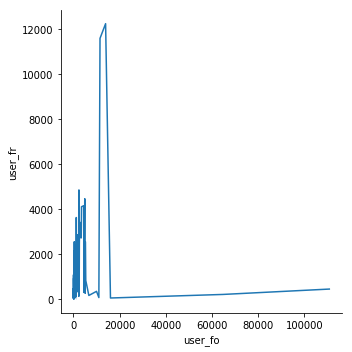

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
"""from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()"""
%matplotlib inline

arr1 = list(data_set['user_followers_count'])
arr2 = list(data_set['user_friends_count'])
data_set_m = pd.DataFrame()
data_set_m['user_fo'] = arr1
data_set_m['user_fr'] = arr2
#print(data_set_m)

"""
p = figure(plot_width=800, plot_height=400)
p.circle(data_set_m['user_fo'],data_set_m['user_fr'],size=10)
show(p)"""
sns.relplot(x = 'user_fo', y= 'user_fr',data=data_set_m,kind='line')
#plt.scatter(data_set_m['user_fo'],data_set_m['user_fr'])

### 자연어 처리